In [1]:
import numpy as np 
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

plt.style.use('seaborn')
sns.set_style("dark")

%matplotlib inline

C:\Users\Jesse\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
data_path = 'C:/Users/Jesse/Desktop/midterm_data/data/'
flights_df = pd.read_csv(data_path + 'flights.csv')

C:\Users\Jesse\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
passengers = pd.read_csv(data_path + 'passengers.csv')

In [4]:
passengers.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0,1,19092,69,2,0,0,753,173,142,...,US,United States,6,677,1,2019,8,2,F,DU
1,0,2,43606,152,95,0,0,409,442,362,...,US,United States,6,673,1,2019,8,1,F,DU
2,0,1,21803,76,63,0,0,554,152,118,...,US,United States,6,673,1,2019,8,2,F,DU
3,0,1,21803,76,61,0,0,979,176,149,...,US,United States,6,673,1,2019,8,2,F,DU
4,0,1,21803,76,59,0,0,1283,226,211,...,US,United States,6,673,1,2019,8,3,F,DU


In [5]:
# Parse fl_date to datetime
flights_df['fl_date'] = pd.to_datetime(flights_df['fl_date'], format='%Y-%m-%d')

#### Number of flights during different days of week

In [6]:
flights = flights_df.loc[flights_df['cancelled'] != 1]
flights.shape

(15658277, 42)

In [7]:
flights['day_name'] = flights['fl_date'].apply(lambda x: calendar.day_name[x.weekday()])

C:\Users\Jesse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
x = pd.DataFrame(flights.groupby('day_name')['mkt_carrier'].count().reset_index()).rename({'mkt_carrier': 'Flights'},axis=1)

In [34]:
x

,day_name,Flights
1,Monday,2344345
0,Friday,2335557
4,Thursday,2311694
6,Wednesday,2262205
5,Tuesday,2257530
3,Sunday,2228008
2,Saturday,1918938


[Text(0.5, 0, 'Day Name'), Text(0.5, 1.0, 'Flights per Month')]

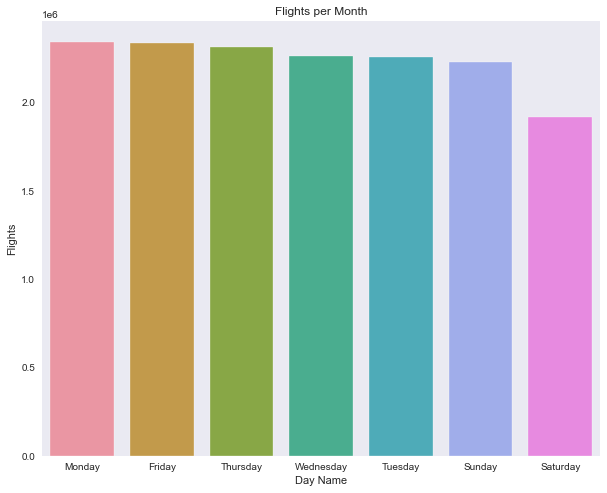

In [95]:
fig, ax = plt.subplots(figsize=(10,8))

ax = sns.barplot(x='day_name', y='Flights', data=x.sort_values(by='Flights', ascending=False), )
ax.set(title = 'Flights per Days of Week', xlabel='Day Name')

In [43]:
# Mondays and Fridays are the busiest days, Saturdays seem to be the least busiest

In [14]:
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,day_name
0,2019-08-22,B6,B6,B6,984,B6,N281JB,984,14492,RDU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
1,2019-08-22,B6,B6,B6,987,B6,N978JB,987,10721,BOS,...,39.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Thursday
2,2019-08-22,B6,B6,B6,988,B6,N983JT,988,12892,LAX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
3,2019-08-22,B6,B6,B6,989,B6,N339JB,989,10721,BOS,...,18.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Thursday
4,2019-08-22,B6,B6,B6,990,B6,N583JB,990,13204,MCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday


#### Heatmap of number of flights(x) with month vs day of week 

In [15]:
flights['month'] = flights['fl_date'].apply(lambda x: calendar.month_name[x.month])

C:\Users\Jesse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


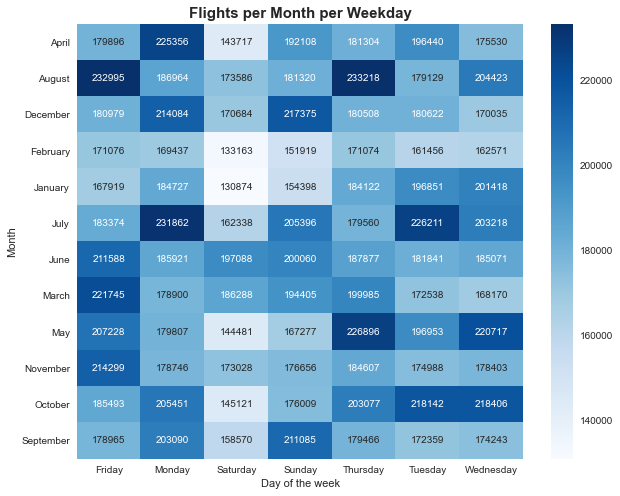

In [16]:
fig, ax = plt.subplots(figsize=(10,8))

y=pd.DataFrame({'count' : flights.groupby(['month', 'day_name']).size()}).reset_index()
y = y.sort_values(['month', 'day_name']).pivot("month", "day_name", "count")

ax=sns.heatmap(y, annot=True, fmt='d',cmap='Blues')

ax.set(xlabel='Day of the week', ylabel='Month')
ax.set_title("Flights per Month per Weekday", fontweight="bold", size=15);

#### Number of passengers by month

In [83]:
passengers['month_name'] = passengers['month'].apply(lambda x: calendar.month_name[int(x)])

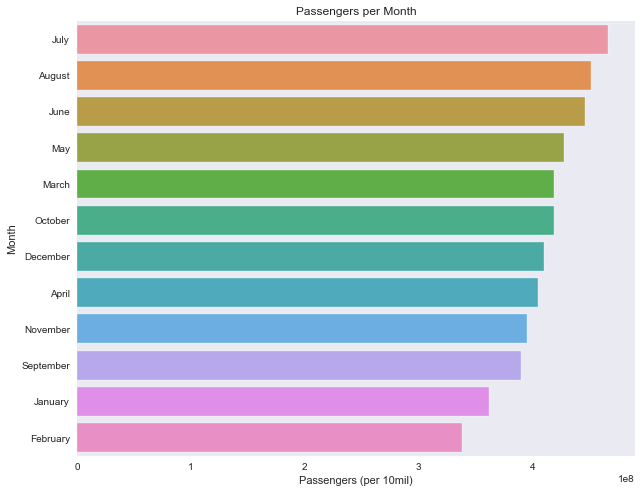

In [92]:
fig, ax = plt.subplots(figsize=(10,8))

z = pd.DataFrame(passengers.groupby('month_name')['passengers'].sum().reset_index()).rename({'month_name': 'Month', 'passengers': 'Passengers'},axis=1)

ax = sns.barplot(x='Passengers', y='Month', data=z.sort_values(by='Passengers', ascending=False))
ax.set(title = 'Passengers per Month', xlabel='Passengers (per 10mil)');